<a href="https://colab.research.google.com/github/solobala/RMSL_9/blob/main/RS_lecture_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import pandas as pd
import numpy as np
from datetime import datetime

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
!wget https://github.com/ALKONDR/netology-recsys/archive/refs/heads/master.zip
!unzip master.zip

--2023-06-25 13:09:07--  https://github.com/ALKONDR/netology-recsys/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/ALKONDR/netology-recsys/zip/refs/heads/master [following]
--2023-06-25 13:09:07--  https://codeload.github.com/ALKONDR/netology-recsys/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.121.9
Connecting to codeload.github.com (codeload.github.com)|140.82.121.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [  <=>               ]   1.06M  4.09MB/s    in 0.3s    

2023-06-25 13:09:07 (4.09 MB/s) - ‘master.zip’ saved [1111929]

Archive:  master.zip
dfe2a910caf170a1f0fd2174867169ce737c9dc7
   creating: netology-recsys-master/
   creating: netology-recsy

In [ ]:
prefix = 'netology-recsys-master/lecture-1'

links = pd.read_csv(os.path.join(prefix, 'links.csv'))
movies = pd.read_csv(os.path.join(prefix, 'movies.csv'))
ratings = pd.read_csv(os.path.join(prefix, 'ratings.csv'))
tags = pd.read_csv(os.path.join(prefix, 'tags.csv'))

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
# Сеолько тэгов проставляет каждый пользователь?
tags.groupby('userId').tag.count()

userId
2         9
7         1
18       16
21        4
49        3
62      370
63        2
76        2
103       5
106       2
112       3
119      14
125      48
132       4
138       2
161       1
166       6
167       1
177       3
184      35
193      20
205       3
226       3
256       2
274       1
288       1
289       4
291       4
300       1
305       8
318      41
319       3
327       7
336      10
341       2
356       5
357      45
419       5
424     273
435       4
439       3
462       5
474    1507
477     280
487       3
506       3
509       3
513       3
520       2
533       3
537     100
543       1
567     432
573      31
599     323
600       1
606       7
610       3
Name: tag, dtype: int64

<Axes: >

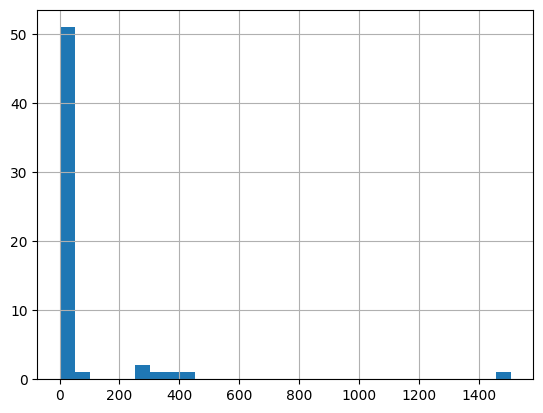

In [ ]:
tags.groupby('userId').tag.count().hist(bins=30)

In [ ]:
tags.groupby('userId').tag.count().median() # Половина пользователей ставит до 5 тэгов, половина большшн

4.0

In [ ]:
tags.groupby('userId').tag.count().mean() # в среднем 63,5 тэгов

63.5

In [ ]:
tags.groupby('movieId').tag.count()

movieId
1         3
2         4
3         2
5         2
7         1
         ..
183611    3
184471    3
187593    3
187595    2
193565    4
Name: tag, Length: 1572, dtype: int64

<Axes: >

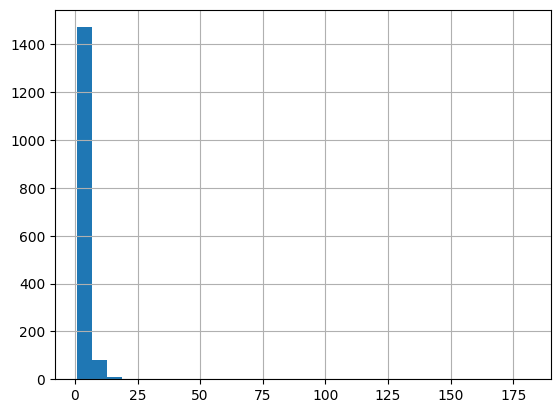

In [ ]:
tags.groupby('movieId').tag.count().hist(bins=30) # Сколько тэгов на каждый фильм?

In [ ]:
tags.groupby('movieId').tag.count().max()

181

In [ ]:
tags.groupby('movieId').tag.count().mean()

2.3428753180661577

In [ ]:
tags.groupby('movieId').tag.count().median()

1.0

In [ ]:
year_month = [] # превращаем timestamp в год-месяц

for t in tqdm_notebook(tags.timestamp.values):
    d = datetime.fromtimestamp(t)
    year_month.append(str(d.year) + '-' + str(d.month))

<ipython-input-19-6d06ee85359e>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for t in tqdm_notebook(tags.timestamp.values):


  0%|          | 0/3683 [00:00<?, ?it/s]

In [ ]:
tags['year_month'] = np.array(year_month)

<Axes: >

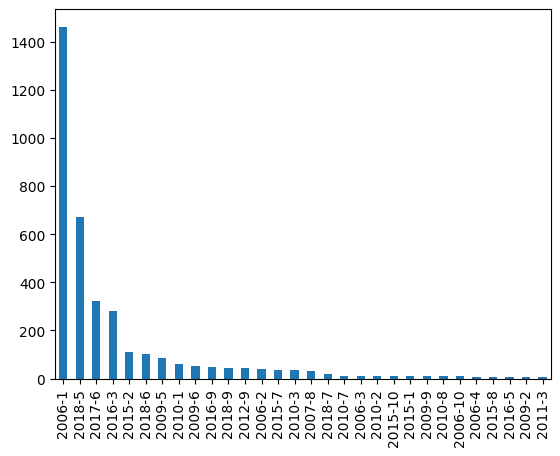

In [ ]:
tags.year_month.value_counts()[:30].plot.bar() # сколько тэгов проставляли пользователи по фильмам

<Axes: >

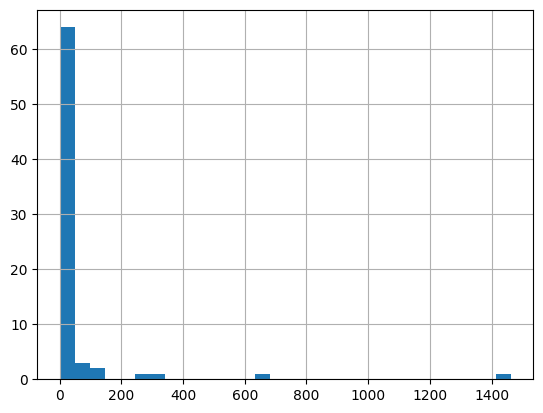

In [ ]:
tags.groupby('year_month').tag.count().hist(bins=30)

In [ ]:
tags.groupby('year_month').tag.count().mean()

50.45205479452055

In [ ]:
tags.groupby('year_month').tag.count().median()

5.0

In [ ]:
num_genres_on_movie = [len(g.split('|')) for g in movies.genres.values] # считаем к-во жансров для каждого из филмов

(array([2.851e+03, 3.218e+03, 2.338e+03, 9.870e+02, 2.710e+02, 6.300e+01,
        1.200e+01, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

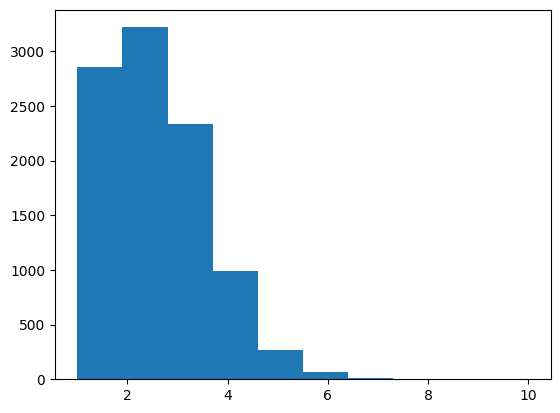

In [ ]:
plt.hist(num_genres_on_movie)

In [ ]:
np.mean(num_genres_on_movie)

2.2668856497639087

In [ ]:
np.median(num_genres_on_movie)

2.0